Root of Mean Squared Error:  5796.284659276274
R Score 0.7835929767120722


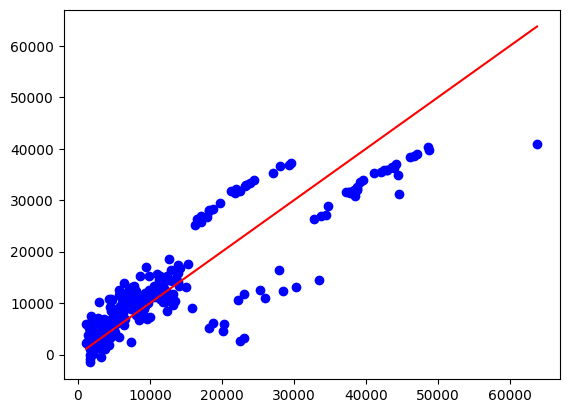

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# load the dataset
data = pd.read_csv('insurance.csv', delimiter=',')

# getting the target column
y = data.iloc[:, -1].values

# removing target column (charges)
data = data.drop(data.columns[-1], axis=1)

# one-hot encode the categorical variables
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# independent variables
X = data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create a linear regression object
model = LinearRegression()

# fit the model with the data
model.fit(X_train, y_train)

# predict the values of y using the model
y_pred = model.predict(X_test)

mean_squared_error = mean_squared_error(y_test, y_pred)

root_mean_squared_error = np.sqrt(mean_squared_error)

# calc the r_score to see the model fitting
r_score = r2_score(y_test, y_pred)

# plotting the actual vs predicted values 
plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')


print('Root of Mean Squared Error: ',root_mean_squared_error)
print('R Score',r_score)

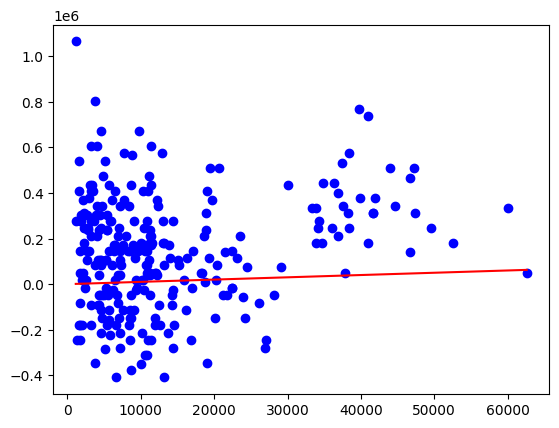

In [82]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('insurance.csv', delimiter=',')



# independent Variables
X = data.iloc[:, :-1]
# dependent variable (target)
y = data.iloc[:, -1]

# one-hot encode the categorical variables
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'])

# splitting data manually into train and test
split_ratio = 0.8

num_of_samples =len(data)
num_train = int(0.8*num_of_samples)
num_test = num_of_samples - num_train
X_train = X[:num_train].values
y_train = y[:num_train].values
X_test = X[num_train:].values
y_test = y[num_train:].values


# adding column of 1 for the X matrix
X = np.column_stack((np.ones(len(X_train)), X_train))

# converting data types into float so we can deal with it
X = X.astype(float)
y = y_train.astype(float)

# getting array transpose to start calc coffs with the eqn(coffs = (X^T · X)^(-1) · X^T · y)
X_transpose = np.transpose(X)
X_transpose_X = np.dot(X_transpose, X)

X_transpose_X_inv = np.linalg.inv(X_transpose_X)
X_transpose_y = np.dot(X_transpose, y)
coefficients = np.dot(X_transpose_X_inv, X_transpose_y)

# getting y_pred for testing the model
y_pred = np.dot(np.column_stack((np.ones(len(X_test)), X_test)), coefficients)

# plotting the actual vs predicted values 
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
